# Introduction to Pandas

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2021](https://github.com/escape2020/school2021)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print(f"Python version: {sys.version}\n"
      f"Pandas version: {pd.__version__}\n"
      f"NumPy version: {np.__version__}\n"
      f"Matplotlib version: {ml.__version__}\n")

rng = np.random.default_rng(42)  # initialise our random number generator

Python version: 3.9.4 | packaged by conda-forge | (default, May 10 2021, 22:10:52) 
[Clang 11.1.0 ]
Pandas version: 1.2.4
NumPy version: 1.20.3
Matplotlib version: 3.4.2



In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [3]:
import pandas as pd

In [4]:
data = [1, 2, 3, 4]

In [5]:
pd.DataFrame(data)

,0
0,1
1,2
2,3
3,4


In [6]:
data = {
    "a": [1, 2, 3],
    "b": [3.5, 2.3, 5.6],
    "c": ["foo", "bar", "baz"],
    "d": 42
}

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,a,b,c,d
0,1,3.5,foo,42
1,2,2.3,bar,42
2,3,5.6,baz,42


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df["a"]

0    1
1    2
2    3
Name: a, dtype: int64

In [11]:
type(df["a"])

pandas.core.series.Series

In [12]:
df["a"] * 23

0    23
1    46
2    69
Name: a, dtype: int64

In [13]:
np.cos(df["a"])

0    0.540302
1   -0.416147
2   -0.989992
Name: a, dtype: float64

In [14]:
rng = np.random.default_rng(42)  # initialise our random number generator

s = pd.Series(rng.integers(0, 10, 5))

In [15]:
s

0    0
1    7
2    6
3    4
4    4
dtype: int64

In [16]:
s.sort_values()

0    0
3    4
4    4
2    6
1    7
dtype: int64

In [18]:
s * s.sort_values()

0     0
1    49
2    36
3    16
4    16
dtype: int64

In [22]:
s * s.sort_values().reset_index(drop=True)

0     0
1    28
2    24
3    24
4    28
dtype: int64

In [23]:
df

,a,b,c,d
0,1,3.5,foo,42
1,2,2.3,bar,42
2,3,5.6,baz,42


In [24]:
data = {
    "a": [1, 2, 3],
    "b": [3.5, 2.3, 5.6],
    "c": ["foo", "bar", "baz"],
    "d": 42
}

In [25]:
df = pd.DataFrame(data)

In [26]:
df

,a,b,c,d
0,1,3.5,foo,42
1,2,2.3,bar,42
2,3,5.6,baz,42


In [27]:
df.dtypes

a      int64
b    float64
c     object
d      int64
dtype: object

In [28]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
df.shape

(3, 4)

In [31]:
df.head(2)

,a,b,c,d
0,1,3.5,foo,42
1,2,2.3,bar,42


In [32]:
df.tail(2)

,a,b,c,d
1,2,2.3,bar,42
2,3,5.6,baz,42


In [33]:
df.describe()

,a,b,d
count,3.0,3.000000,3.0
mean,2.0,3.800000,42.0
std,1.0,1.670329,0.0
min,1.0,2.300000,42.0
25%,1.5,2.900000,42.0
50%,2.0,3.500000,42.0
75%,2.5,4.550000,42.0
max,3.0,5.600000,42.0


### Slicing

In [35]:
%shorterr df[3]

KeyError: 3


In [ ]:
df.loc
df.iloc

In [36]:
df

,a,b,c,d
0,1,3.5,foo,42
1,2,2.3,bar,42
2,3,5.6,baz,42


In [40]:
%shorterr df.loc[-1]

KeyError: -1


In [45]:
%shorterr df.iloc[123]

IndexError: single positional indexer is out-of-bounds


In [47]:
df.iloc[1:3]

,a,b,c,d
1,2,2.3,bar,42
2,3,5.6,baz,42


### Grouped operations

In [48]:
df = pd.DataFrame({'location' : ['Italy', 'France', 'Italy', 'Italy',
                                 'France', 'Italy', 'France', 'France'],
                   'detector' : ['ARCA_DU1', 'ORCA_DU2', 'ARCA_DU3', 'ARCA_DU4',
                                 'ANTARES', 'NEMO', 'ORCA_DU1', 'ORCA_DU5'],
                   'x' : rng.random(8),
                   'y' : rng.random(8)})
df

,location,detector,x,y
0,Italy,ARCA_DU1,0.697368,0.926765
1,France,ORCA_DU2,0.094177,0.643865
2,Italy,ARCA_DU3,0.975622,0.822762
3,Italy,ARCA_DU4,0.761140,0.443414
4,France,ANTARES,0.786064,0.227239
5,Italy,NEMO,0.128114,0.554585
6,France,ORCA_DU1,0.450386,0.063817
7,France,ORCA_DU5,0.370798,0.827631


In [50]:
df_by_location = df.groupby("location")

In [51]:
df_by_location.groups

{'France': [1, 4, 6, 7], 'Italy': [0, 2, 3, 5]}

In [52]:
df_by_location.get_group("France")

,location,detector,x,y
1,France,ORCA_DU2,0.094177,0.643865
4,France,ANTARES,0.786064,0.227239
6,France,ORCA_DU1,0.450386,0.063817
7,France,ORCA_DU5,0.370798,0.827631


In [53]:
df_by_location.get_group("France")["x"]

1    0.094177
4    0.786064
6    0.450386
7    0.370798
Name: x, dtype: float64

In [54]:
df = pd.DataFrame({
    'event_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'hit_time': [23, 13, 14, 44, 23, 45, 1, 2, 4],
    'pmt_id': [4, 3, 5, 30, 5, 5, 3, 5, 3]
})
df

,event_id,hit_time,pmt_id
0,1,23,4
1,1,13,3
2,1,14,5
3,2,44,30
4,2,23,5
5,3,45,5
6,3,1,3
7,3,2,5
8,3,4,3


In [56]:
for event_id, hits in df.groupby("event_id"):
    print(event_id)
    print(hits)
    print()

1
   event_id  hit_time  pmt_id
0         1        23       4
1         1        13       3
2         1        14       5

2
   event_id  hit_time  pmt_id
3         2        44      30
4         2        23       5

3
   event_id  hit_time  pmt_id
5         3        45       5
6         3         1       3
7         3         2       5
8         3         4       3



In [57]:
df.groupby("event_id")["hit_time"].min()

event_id
1    13
2    23
3     1
Name: hit_time, dtype: int64

In [58]:
df.groupby("event_id")["hit_time"].max()

event_id
1    23
2    44
3    45
Name: hit_time, dtype: int64

In [61]:
df.groupby("event_id")["hit_time"].sum()

event_id
1    50
2    67
3    52
Name: hit_time, dtype: int64

In [64]:
df.groupby("event_id")["hit_time"].aggregate([np.min, np.median, sum, min, max])

,amin,median,sum,min,max
event_id,,,,,
1,13,14.0,50,13,23
2,23,33.5,67,23,44
3,1,3.0,52,1,45


### Transformations

In [65]:
N = 1000
index = pd.date_range("2021-06-09", periods=N, freq="D")

In [66]:
index

DatetimeIndex(['2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18',
               ...
               '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
               '2024-03-03', '2024-03-04'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [67]:
ts = pd.Series(rng.normal(0.5, 2, N), index)

In [68]:
ts

2021-06-09    0.400148
2021-06-10    0.130275
2021-06-11   -0.861859
2021-06-12    2.945083
2021-06-13    0.190941
                ...   
2024-02-29   -1.590087
2024-03-01   -1.542090
2024-03-02    0.604347
2024-03-03   -0.047701
2024-03-04   -0.173664
Freq: D, Length: 1000, dtype: float64

In [70]:
ts.rolling(window=100, min_periods=100).mean()

2021-06-09         NaN
2021-06-10         NaN
2021-06-11         NaN
2021-06-12         NaN
2021-06-13         NaN
                ...   
2024-02-29    0.647233
2024-03-01    0.603662
2024-03-02    0.575979
2024-03-03    0.559914
2024-03-04    0.525909
Freq: D, Length: 1000, dtype: float64

In [72]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts

2021-09-16    0.371997
2021-09-17    0.368208
2021-09-18    0.351436
2021-09-19    0.368640
2021-09-20    0.348589
                ...   
2024-02-29    0.647233
2024-03-01    0.603662
2024-03-02    0.575979
2024-03-03    0.559914
2024-03-04    0.525909
Freq: D, Length: 901, dtype: float64

In [79]:
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std())

In [75]:
grouped = ts.groupby(lambda x: x.year)
grouped.mean()

2021    0.348990
2022    0.501918
2023    0.364292
2024    0.492962
dtype: float64

In [77]:
grouped.std()

2021    0.095931
2022    0.113224
2023    0.148435
2024    0.155354
dtype: float64

In [81]:
grouped_trans = transformed.groupby(lambda x: x.year)

In [82]:
grouped_trans.mean()

2021    3.050519e-16
2022   -4.002886e-16
2023    2.342114e-16
2024    1.903859e-16
dtype: float64

In [83]:
grouped_trans.std()

2021    1.0
2022    1.0
2023    1.0
2024    1.0
dtype: float64

<AxesSubplot:>

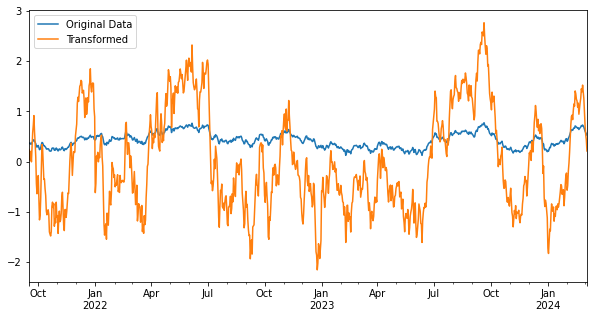

In [84]:
pd.DataFrame({"Original Data": ts, "Transformed": transformed}).plot()

In [85]:
N = 1000

df = pd.DataFrame({
    "foo": np.cumsum(rng.random(N)),
    "bar": np.cumsum(rng.random(N)),
    "narf": np.cumsum(rng.random(N)),
})

<AxesSubplot:>

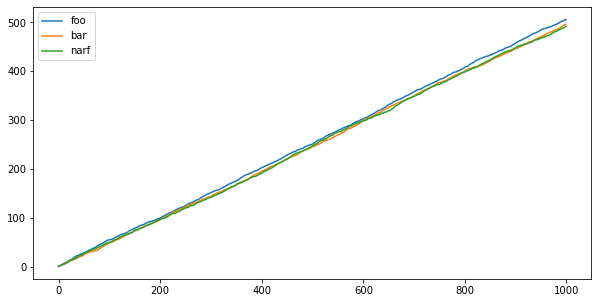

In [86]:
df.plot()

array([[<AxesSubplot:title={'center':'foo'}>,
        <AxesSubplot:title={'center':'bar'}>],
       [<AxesSubplot:title={'center':'narf'}>, <AxesSubplot:>]],
      dtype=object)

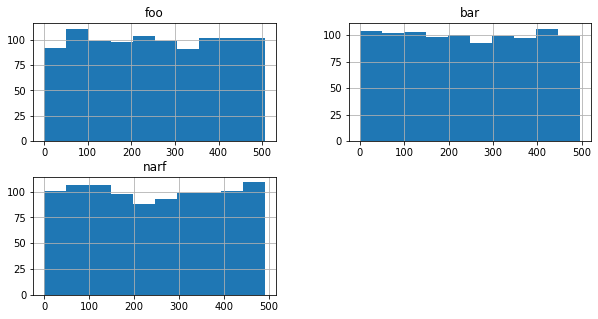

In [87]:
df.hist()

In [ ]:
df.plot()

### Memory Usage of DataFrames

In [88]:
rng = np.random.default_rng(42)  # initialise our random number generator

data = rng.random((10_000_000, 6))

In [89]:
df = pd.DataFrame(data, columns=list("abcdef"))

In [92]:
df.head()

,a,b,c,d,e,f
0,0.773956,0.438878,0.858598,0.697368,0.094177,0.975622
1,0.761140,0.786064,0.128114,0.450386,0.370798,0.926765
2,0.643865,0.822762,0.443414,0.227239,0.554585,0.063817
3,0.827631,0.631664,0.758088,0.354526,0.970698,0.893121
4,0.778383,0.194639,0.466721,0.043804,0.154289,0.683049


In [93]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   a       float64
 1   b       float64
 2   c       float64
 3   d       float64
 4   e       float64
 5   f       float64
dtypes: float64(6)
memory usage: 457.8 MB


In [94]:
df = pd.read_clipboard()

In [95]:
df

,a,b,c
0,123,124,56
1,123,123,45
2,12,45,3


### Subsampling

In [100]:
data = rng.random((10_000_000, 6))
df = pd.DataFrame(data, columns=list("abcdef"))

In [101]:
df.head()

,a,b,c,d,e,f
0,0.280035,0.919270,0.471941,0.784350,0.768103,0.769650
1,0.419265,0.273855,0.408748,0.055677,0.086819,0.816185
2,0.856658,0.450947,0.456774,0.137052,0.170971,0.321521
3,0.749663,0.653190,0.692913,0.350700,0.001179,0.140627
4,0.902509,0.329731,0.817463,0.296734,0.025924,0.979293


In [102]:
subsample = df.sample(frac=0.1, random_state=42)
remaining = df.drop(subsample.index)

In [103]:
subsample

,a,b,c,d,e,f
919213,0.426697,0.715573,0.304253,0.674274,0.914347,0.123704
9467153,0.361370,0.501865,0.216375,0.040527,0.465747,0.758964
6585777,0.962788,0.358012,0.622822,0.219717,0.670701,0.684356
3878022,0.589864,0.047480,0.345316,0.365620,0.096439,0.729696
5537116,0.250180,0.405046,0.190722,0.700733,0.882960,0.917538
...,...,...,...,...,...,...
3553239,0.430429,0.032318,0.025750,0.698011,0.962983,0.190569
1662635,0.734116,0.073550,0.015998,0.422123,0.592630,0.828975
2362261,0.895183,0.053976,0.397039,0.754921,0.806639,0.926247
7669748,0.315812,0.026701,0.665230,0.575307,0.867556,0.684579


In [104]:
remaining

,a,b,c,d,e,f
0,0.280035,0.919270,0.471941,0.784350,0.768103,0.769650
1,0.419265,0.273855,0.408748,0.055677,0.086819,0.816185
3,0.749663,0.653190,0.692913,0.350700,0.001179,0.140627
4,0.902509,0.329731,0.817463,0.296734,0.025924,0.979293
5,0.593457,0.641403,0.611172,0.533223,0.855317,0.519326
...,...,...,...,...,...,...
9999995,0.034571,0.952873,0.418045,0.100764,0.057915,0.396627
9999996,0.537228,0.504454,0.511739,0.768283,0.799571,0.610943
9999997,0.366430,0.291527,0.064164,0.898121,0.814905,0.350666
9999998,0.019926,0.646040,0.460425,0.548258,0.539662,0.824599


### Exercises

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/neutrinos.csv`.

In [130]:
neutrinos = pd.read_csv("data/neutrinos.csv",
                 skiprows=5,
                 comment="$",
                 sep=":",
                 index_col=0,
                 skipfooter=1,
                 decimal=","
                )

<ipython-input-130-35eead423a2d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  neutrinos = pd.read_csv("data/neutrinos.csv",


In [131]:
neutrinos

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.04899799823760986,3.366400,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.28047099709510803,3.890000,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.1198429986834526,3.233500,71.722,121.449,363.077,0.828343,0.171657
3,0.520486,1.939326,0.06131500005722046,4.784000,-47.592,-84.466,350.687,0.842315,0.157685
4,2.856970,1.678897,0.06146499887108803,3.983300,-25.518,24.362,391.891,0.862275,0.137725
...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.09328900277614594,6.696500,-25.916,91.493,444.696,0.804391,0.195609
60974,4.933224,0.729290,0.33532699942588806,22.188999,-68.489,-78.661,389.067,0.886228,0.113772
60975,1.028631,1.091732,0.3252660036087036,14.085000,-66.319,56.084,378.345,0.824351,0.175649
60976,5.993753,1.713249,0.08711300045251846,6.198300,-47.727,66.036,372.069,0.976048,0.023952


In [132]:
neutrinos.dtypes

azimuth        float64
zenith         float64
bjorkeny        object
energy         float64
pos_x          float64
pos_y          float64
pos_z          float64
proba_track    float64
proba_cscd     float64
dtype: object

In [135]:
%shorterr neutrinos.bjorkeny.astype(float)

ValueError: could not convert string to float: '4,999999873689376e-05'


In [136]:
sum("," in b for b in neutrinos.bjorkeny)

2

In [137]:
bjorkeny_with_comma_mask = neutrinos.bjorkeny.str.contains(",")

In [138]:
bjorkeny_with_comma_mask

0        False
1        False
2        False
3        False
4        False
         ...  
60973    False
60974    False
60975    False
60976    False
60977    False
Name: bjorkeny, Length: 60978, dtype: bool

In [139]:
neutrinos[bjorkeny_with_comma_mask]

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
25958,2.309464,1.575072,"4,999999873689376e-05",30.391001,44.431,-10.498,436.929,1.0,0.0
29803,4.011943,2.467239,"9,899999713525176e-05",31.641001,56.129,-87.262,396.509,1.0,0.0


In [143]:
neutrinos.bjorkeny = neutrinos.bjorkeny.str.replace(",", ".").astype(float)

In [144]:
neutrinos

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725
...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952


In [145]:
neutrinos.dtypes

azimuth        float64
zenith         float64
bjorkeny       float64
energy         float64
pos_x          float64
pos_y          float64
pos_z          float64
proba_track    float64
proba_cscd     float64
dtype: object

## Exercise 2

Create a histogram of the neutrino energies.

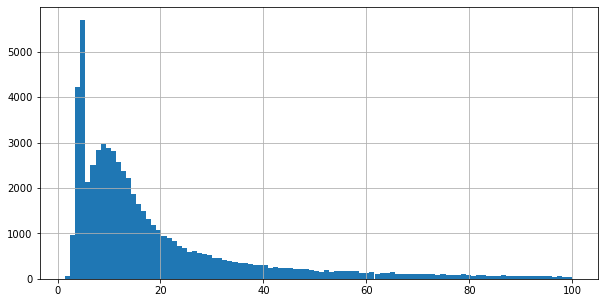

In [148]:
neutrinos.energy.hist(bins=100);

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`.

In [149]:
reco = pd.read_csv("data/reco.csv", index_col=0)

In [150]:
reco

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818
...,...,...,...,...,...,...,...,...,...
60973,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867
60974,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958
60975,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264
60976,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596


In [151]:
reco.dtypes

zenith             float64
azimuth            float64
energy_muon        float64
energy_neutrino    float64
bjorken_y          float64
quality            float64
pos_x              float64
pos_y              float64
pos_z              float64
dtype: object

## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  into a single `DataFrame`

pd.concat()

In [152]:
reco

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818
...,...,...,...,...,...,...,...,...,...
60973,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867
60974,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958
60975,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264
60976,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596


In [153]:
neutrinos

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725
...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952


In [155]:
reco.add_prefix("reco_")

,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818
...,...,...,...,...,...,...,...,...,...
60973,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867
60974,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958
60975,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264
60976,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596


In [158]:
data = pd.concat([neutrinos, reco.add_prefix("reco_")], axis="columns")

In [159]:
data.head()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,0.520486,1.939326,0.061315,4.7840,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,2.856970,1.678897,0.061465,3.9833,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


In [160]:
data.columns

Index(['azimuth', 'zenith', 'bjorkeny', 'energy', 'pos_x', 'pos_y', 'pos_z',
       'proba_track', 'proba_cscd', 'reco_zenith', 'reco_azimuth',
       'reco_energy_muon', 'reco_energy_neutrino', 'reco_bjorken_y',
       'reco_quality', 'reco_pos_x', 'reco_pos_y', 'reco_pos_z'],
      dtype='object')

In [162]:
data.dtypes

azimuth                 float64
zenith                  float64
bjorkeny                float64
energy                  float64
pos_x                   float64
pos_y                   float64
pos_z                   float64
proba_track             float64
proba_cscd              float64
reco_zenith             float64
reco_azimuth            float64
reco_energy_muon        float64
reco_energy_neutrino    float64
reco_bjorken_y          float64
reco_quality            float64
reco_pos_x              float64
reco_pos_y              float64
reco_pos_z              float64
dtype: object

## Exercise 5

Make a scatter plot to visualise the zenith reconstruction quality.

`data = pd.concat([neutrinos reco.add_prefix('reco_')], axis="columns")`

<AxesSubplot:xlabel='zenith'>

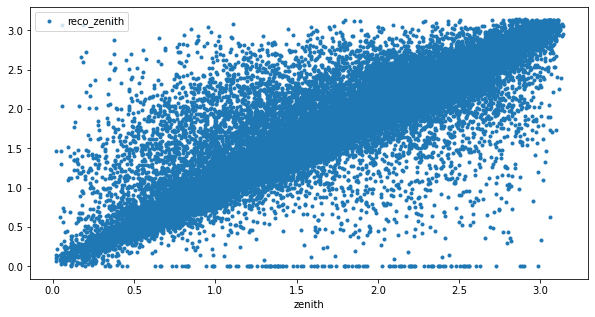

In [164]:
data.plot(x="zenith", y="reco_zenith", style=".")

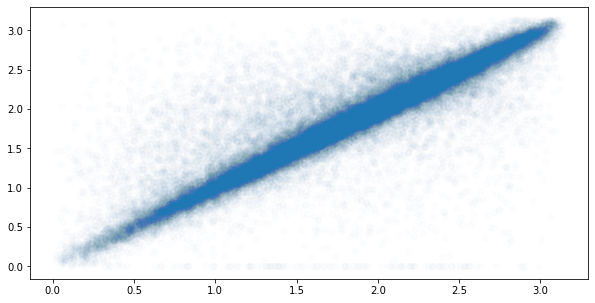

In [165]:
fig, ax = plt.subplots()
ax.scatter(data["zenith"], data["reco_zenith"], alpha=0.01)

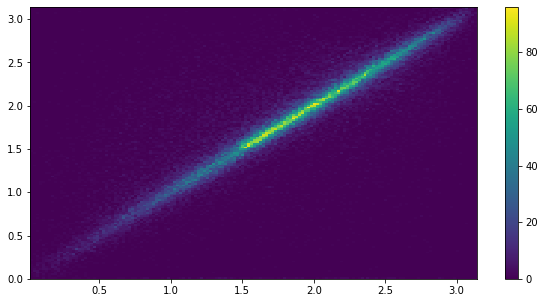

In [168]:
fig, ax = plt.subplots()
counts, xedges, yedes, im = ax.hist2d(data["zenith"], data["reco_zenith"], bins=150)
fig.colorbar(im)

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

In [169]:
ebins = [1, 5, 10, 20, 100]
neutrinos["ebin"] = pd.cut(neutrinos.energy, ebins, labels=False)

In [171]:
neutrinos.tail()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,ebin
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609,1
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772,3
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649,2
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952,1
60977,2.409518,0.521768,0.183048,8.183000,62.589,90.369,449.204,0.840319,0.159681,1


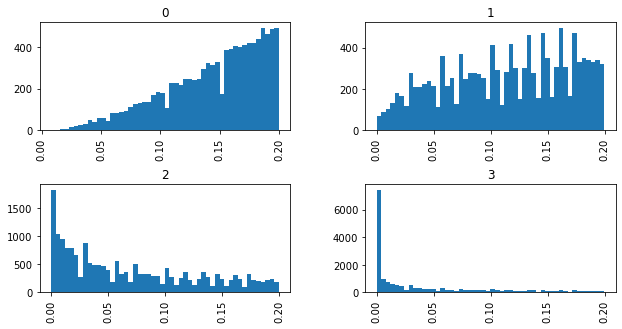

In [174]:
neutrinos.hist("proba_cscd", by="ebin", bins=50);

### Read a KM3NeT Event File `data/hits.h5`

In [175]:
!ptdump data/hits.h5

/ (RootGroup) ''
/hits (Group) ''
/hits/axis0 (Array(5,)) ''
/hits/axis1 (Array(2361,)) ''
/hits/block0_items (Array(1,)) ''
/hits/block0_values (Array(2361, 1)) ''
/hits/block1_items (Array(1,)) ''
/hits/block1_values (Array(2361, 1)) ''
/hits/block2_items (Array(1,)) ''
/hits/block2_values (Array(2361, 1)) ''
/hits/block3_items (Array(2,)) ''
/hits/block3_values (Array(2361, 2)) ''


In [176]:
hits = pd.read_hdf("data/hits.h5", "/hits")

In [177]:
hits

,dom_id,pmt_id,time,tot,triggermask
0,808949902,28,15920424,22,4
1,808949902,30,15920388,28,4
2,808963189,2,15920664,30,6
3,808963189,7,15920663,18,6
4,808963189,11,15920658,27,6
...,...,...,...,...,...
2356,808985283,9,3870706,26,4
2357,808985283,11,3870702,26,4
2358,808985283,16,3870707,6,4
2359,809004291,2,3870610,27,4


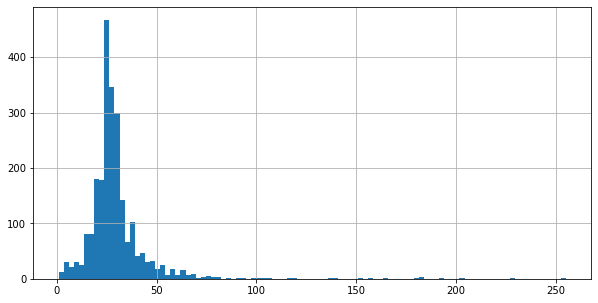

In [179]:
hits.tot.hist(bins=100);

In [181]:
hits_by_dom_id = hits.groupby("dom_id")

In [182]:
for dom_id, dom_hits in hits_by_dom_id:
    print(dom_id)
    print(dom_hits)

808432848
         dom_id  pmt_id      time  tot  triggermask
13    808432848      28  59317389   24            4
35    808432848       3  75610163   25           22
36    808432848       4  75610160   30           22
37    808432848       6  75610160   26           22
38    808432848       8  75610157   38           22
...         ...     ...       ...  ...          ...
2264  808432848       0  96099772   32           22
2265  808432848       5  96099773   30           22
2326  808432848       0  18579789   42           22
2327  808432848       1  18579798   23           22
2328  808432848       5  18579793   30           22

[147 rows x 5 columns]
808432849
         dom_id  pmt_id      time  tot  triggermask
14    808432849      30  59317328   20            4
40    808432849       6  75610081   30           22
41    808432849       8  75610071   29           22
42    808432849      28  75610141   22            4
183   808432849       0  60031724   32            4
...         ...     

In [183]:
hits_by_dom_id.get_group(809548770)

,dom_id,pmt_id,time,tot,triggermask
11,809548770,0,15920482,24,6
12,809548770,28,15920479,28,6
32,809548770,10,79528160,21,6
33,809548770,11,79528157,19,6
34,809548770,12,79528157,25,6
...,...,...,...,...,...
2310,809548770,16,53736218,34,22
2311,809548770,17,53736219,37,22
2312,809548770,20,53736220,25,22
2313,809548770,27,53736223,20,22


In [184]:
hits.sort_values(["dom_id", "time"]).groupby("dom_id").first()

,pmt_id,time,tot,triggermask
dom_id,,,,
808432848,5,4934675,28,4
808432849,5,3075269,27,16
808476737,5,4933532,22,6
808483667,8,4934738,22,4
808483678,0,6197196,34,22
808945480,0,3076435,29,16
808945629,7,4934811,58,4
808949646,7,6905555,49,6
808949902,0,3075703,24,4


In [185]:
hits_by_dom_id

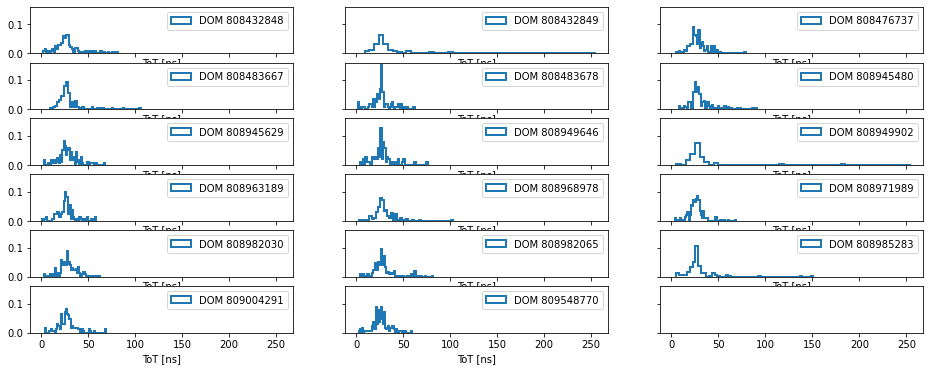

In [187]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 6), sharex=True, sharey=True)

hist_style = dict(bins=50, density=True, histtype="step", linewidth=2)

for ax, (dom_id, _hits) in zip(axes.flatten(), hits_by_dom_id):
    ax.hist(_hits["tot"], label=f"DOM {dom_id}", **hist_style)
    ax.legend()
    ax.set_xlabel("ToT [ns]")

In [188]:
neutrinos

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,ebin
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649,0
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637,0
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657,0
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685,0
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725,0
...,...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609,1
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772,3
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649,2
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952,1
